In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
# Load the CSV file into a DataFrame
df = pd.read_csv('melb_data.csv')


In [2]:

# Handle missing values
df['Car'].fillna(df['Car'].median(), inplace=True)
df['BuildingArea'].fillna(df['BuildingArea'].median(), inplace=True)
df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=True)
df['CouncilArea'].fillna(df['CouncilArea'].mode()[0], inplace=True)


In [3]:
# Get the range of latitude and longitude
lat_min = df['Lattitude'].min()
lat_max = df['Lattitude'].max()
lon_min = df['Longtitude'].min()
lon_max = df['Longtitude'].max()

print(f'Latitude range: {lat_min} to {lat_max}')
print(f'Longitude range: {lon_min} to {lon_max}')

Latitude range: -38.18255 to -37.40853
Longitude range: 144.43181 to 145.52635


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
# Select features and target variable
X = df.drop(columns=['Price', 'Address', 'Date'])  # Drop non-numeric and target columns
y = df['Price']

# Encode categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 123243631383.72179
R^2 Score: 0.689729776222253


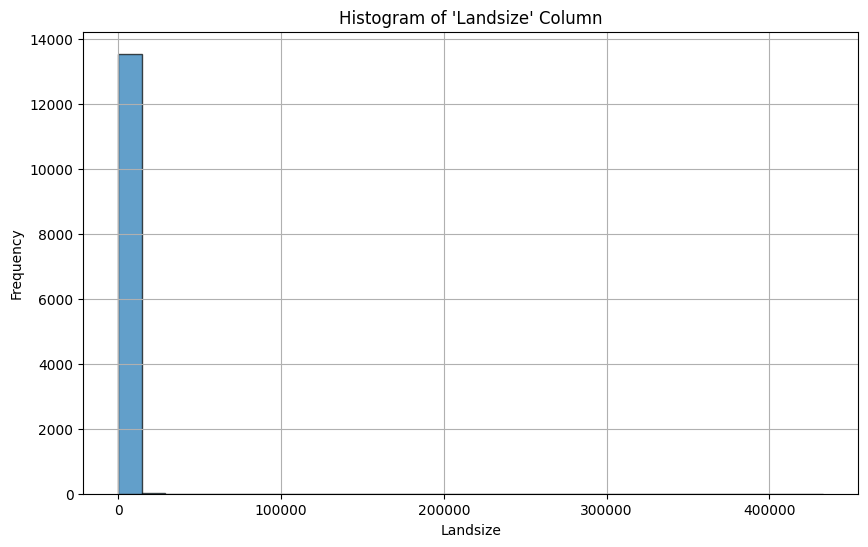

In [ ]:
# Create a histogram of the 'distance' column
colum_of_interest = 'Landsize'
plt.figure(figsize=(10, 6))
plt.hist(df[colum_of_interest].dropna(), bins=1000, edgecolor='k', alpha=0.7)
plt.title(f'Histogram of \'{colum_of_interest}\' Column')
plt.xlabel(colum_of_interest)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()